In [91]:
%matplotlib inline

In [92]:
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sns
import matplotlib.patches as mpatches

In [93]:
#load tables 
batting_reg = pd.DataFrame.from_csv('data/batting.csv', index_col = None, encoding = 'utf-8')
pitching_reg = pd.DataFrame.from_csv('data/pitching.csv', index_col = None, encoding = 'utf-8')
player = pd.DataFrame.from_csv('data/player.csv', index_col = None, encoding = 'utf-8')

In [94]:
#Cleaning up PLayer info
player_name = player[['player_id', 'name_first', 'name_last', 'birth_year']]
player_name = player_name[pd.notnull(player_name['birth_year'])]
player_name['birth_year'] = player_name['birth_year'].astype('int')
player_name.set_index('player_id').head()

,name_first,name_last,birth_year
player_id,,,
aardsda01,David,Aardsma,1981
aaronha01,Hank,Aaron,1934
aaronto01,Tommie,Aaron,1939
aasedo01,Don,Aase,1954
abadan01,Andy,Abad,1972


In [95]:
#Hitters' age
batting = batting_reg[['player_id', 'year', 'team_id']]
batting['year'] = batting['year'].astype('int')
batting.set_index('player_id')
batting_age = pd.merge(batting, player_name, on = 'player_id')
batting_age['age'] = batting_age['year'].sub(batting_age['birth_year'])
batting_age.drop_duplicates().head()

C:\Users\lawew\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player_id,year,team_id,name_first,name_last,birth_year,age
0,abercda01,1871,TRO,Frank,Abercrombie,1850,21
1,addybo01,1871,RC1,Bob,Addy,1842,29
2,addybo01,1873,PH2,Bob,Addy,1842,31
3,addybo01,1873,BS1,Bob,Addy,1842,31
4,addybo01,1874,HR1,Bob,Addy,1842,32


In [128]:
#pitching age
pitching = pitching_reg[['player_id', 'year', 'team_id']]
pitching['year'] = pitching['year'].astype('int')
pitching.set_index('player_id')
pitching_age = pd.merge(pitching, player_name, on = 'player_id')
pitching_age['age'] = pitching_age['year'].sub(pitching_age['birth_year'])
pitching_age.drop_duplicates().head()

C:\Users\lawew\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player_id,year,team_id,name_first,name_last,birth_year,age
0,bechtge01,1871,PH1,George,Bechtel,1848,23
1,bechtge01,1873,PH2,George,Bechtel,1848,25
2,bechtge01,1874,PH2,George,Bechtel,1848,26
3,bechtge01,1875,PH1,George,Bechtel,1848,27
4,bechtge01,1875,PH3,George,Bechtel,1848,27


In [97]:
#Average Batters Age
batting_avg_age = batting_age.groupby('year')['age'].mean().reset_index()
b_year_age = batting_avg_age['year']
b_age = batting_avg_age['age']

#Average Pitchers Age
pitching_avg_age = pitching_age.groupby('year')['age'].mean().reset_index()
p_year_age = pitching_avg_age['year']
p_age = pitching_avg_age['age']

In [98]:
#function to convert year to decade
def dec(x):
    return int(x / 10) * 10

#batting age by decade
b_dec_age = batting_age[['year', 'age']]
b_dec_age['year'] = b_dec_age['year'].map(dec)
#pitching age
p_dec_age = pitching_age[['year', 'age']]
p_dec_age['year'] = p_dec_age['year'].map(dec)

C:\Users\lawew\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\lawew\OneDrive\Documents\New folder\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [99]:
fig = plt.figure(figsize=(8,4), dpi=100)

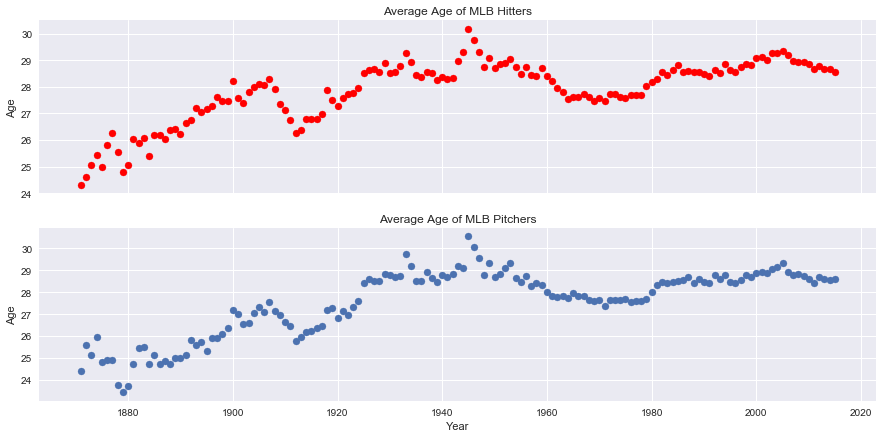

In [100]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,7), sharex = True)

ax1.scatter(b_year_age, b_age, color = 'red')
ax1.set_ylabel('Age')
ax1.set_title('Average Age of MLB Hitters')

ax2.scatter(p_year_age, p_age)
ax2.set_xlabel('Year')
ax2.set_ylabel('Age')
ax2.set_title('Average Age of MLB Pitchers')

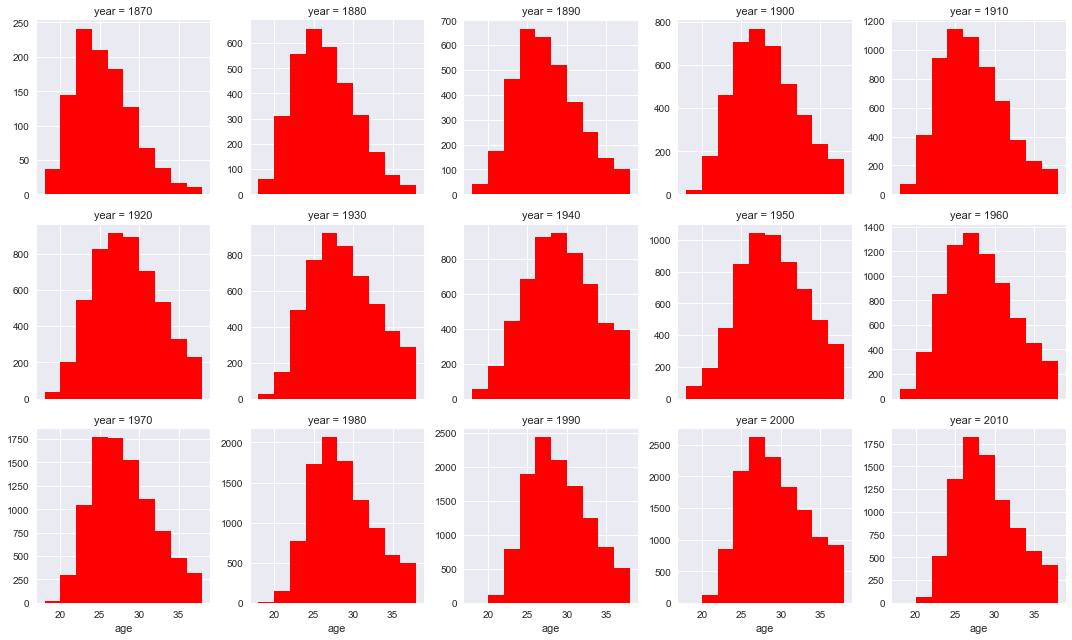

In [101]:
bins = np.arange(18, 40, 2)
decade = sns.FacetGrid(b_dec_age, col = 'year', col_wrap = 5, sharey = False)
decade = decade.map(plt.hist, 'age', bins = bins, color = 'red')

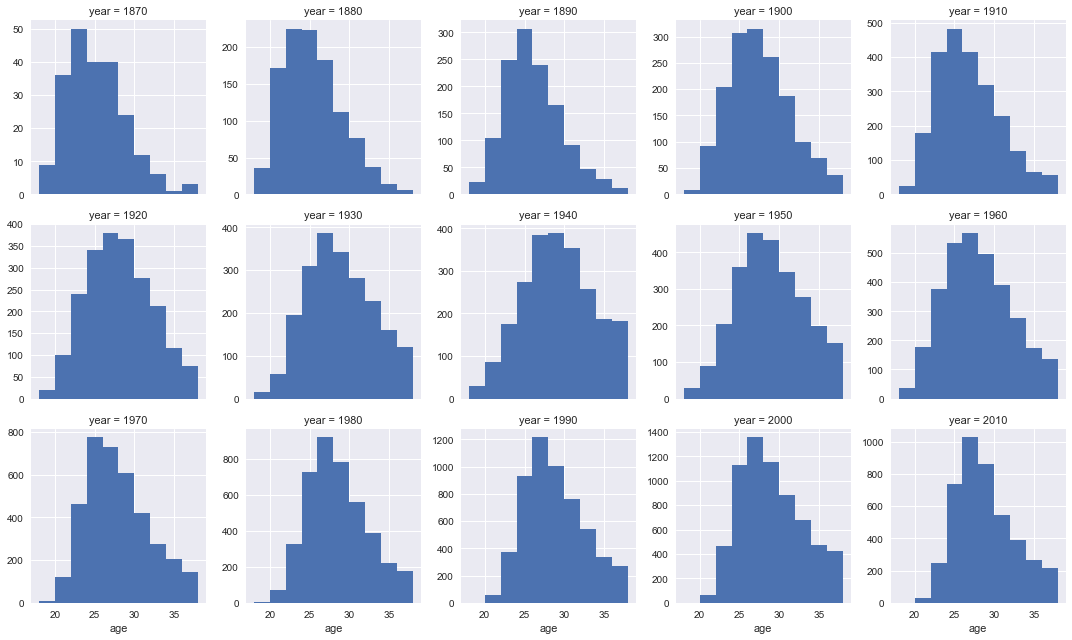

In [102]:
bins = np.arange(18, 40, 2)
decade_p = sns.FacetGrid(p_dec_age, col = 'year', col_wrap = 5, sharey = False)
decade_p = decade_p.map(plt.hist, 'age', bins = bins)

In [103]:
teams = pd.DataFrame.from_csv('data/team.csv', index_col = None, encoding = 'utf-8')
teams.head()

,year,league_id,team_id,franchise_id,div_id,rank,g,ghome,w,l,...,dp,fp,name,park,attendance,bpf,ppf,team_id_br,team_id_lahman45,team_id_retro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [117]:
t = teams[['name', 'franchise_id', 'team_id', 'w', 'l']].set_index('team_id')
bat_age = batting_age.set_index('team_id')
pit_age = pitching_age.set_index('team_id')

b_age = bat_age.join(t)
p_age = pit_age.join(t)

b_age = b_age.loc[b_age['year'] >= 1961, :]
p_age = p_age.loc[p_age['year'] >= 1961, :]

b_age = b_age.groupby('franchise_id')['age', 'w'].mean()
p_age = p_age.groupby('franchise_id')['age', 'w'].mean()

In [125]:
fig = plt.figure(figsize=(8,4), dpi=100)

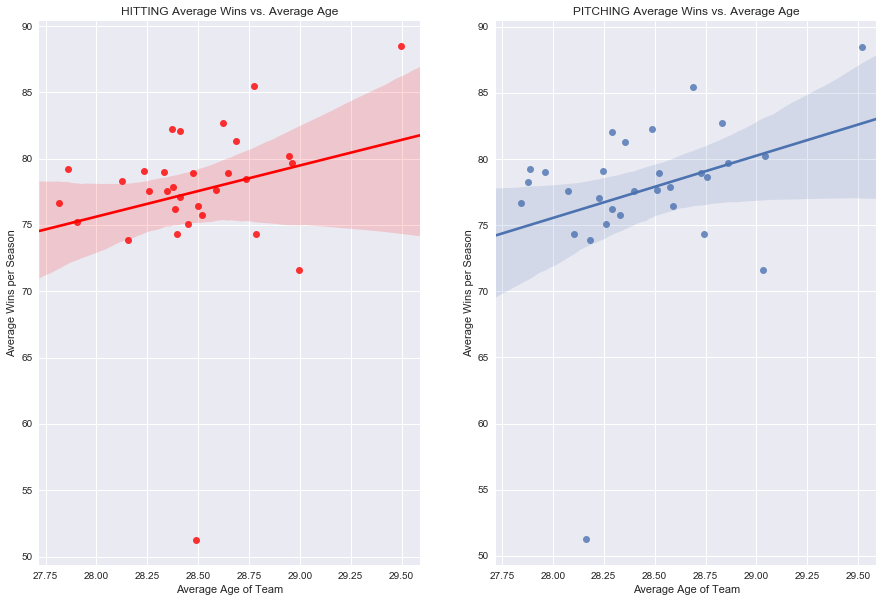

In [126]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 10), sharex = True)

sns.regplot(x="age", y="w", data=b_age, fit_reg = True, ax=ax1, color='red')
ax1.set_xlabel('Average Age of Team')
ax1.set_ylabel('Average Wins per Season')
ax1.set_title('HITTING Average Wins vs. Average Age')

sns.regplot(x='age', y='w', data=p_age, fit_reg = True, ax=ax2)
ax2.set_xlabel('Average Age of Team')
ax2.set_ylabel('Average Wins per Season')
ax2.set_title('PITCHING Average Wins vs. Average Age')
None